# **Data Overview**

In [14]:
from google.colab import files
da = files.upload()

Saving poverty_level_wages.csv to poverty_level_wages.csv


In [16]:
import pandas as pd

In [17]:
poverty_level_wages_data = pd.read_csv('poverty_level_wages.csv')

In [18]:
poverty_level_wages_data.head()

,year,annual_poverty-level_wage,hourly_poverty-level_wage,0-75%_of_poverty_wages,75-100%_of_poverty_wages,share_below_poverty_wages,100-125%_of_poverty_wages,125-200%_of_poverty_wages,200-300%_of_poverty_wages,300%+_of_poverty_wages,...,women_300%+_of_poverty_wages,white_share_below_poverty_wages,white_men_share_below_poverty_wages,white_women_share_below_poverty_wages,black_share_below_poverty_wages,black_men_share_below_poverty_wages,black_women_share_below_poverty_wages,hispanic_share_below_poverty_wages,hispanic_men_share_below_poverty_wages,hispanic_women_share_below_poverty_wages
0,2022,27733,13.33,4.7,7.5,12.2,15.2,32.7,19.5,20.4,...,16.7,10.7,8.1,13.5,16.2,14.5,17.7,15.4,12.3,19.2
1,2021,25688,12.35,3.8,9.1,12.9,15.0,30.3,20.4,21.5,...,17.4,11.1,8.7,13.8,18.0,15.7,19.9,16.8,14.2,20.0
2,2020,24544,11.80,3.4,8.6,12.0,13.0,31.5,20.8,22.6,...,18.1,10.4,7.9,13.1,18.1,15.4,20.5,14.9,12.0,18.6
3,2019,24242,11.65,4.4,11.3,15.7,14.2,31.2,18.7,20.3,...,16.0,13.4,10.5,16.6,22.3,19.2,24.9,19.7,15.8,24.6
4,2018,23809,11.45,5.0,13.0,18.1,14.2,29.3,19.1,19.4,...,15.2,15.0,11.6,18.7,26.0,23.1,28.5,24.3,19.3,30.7


# **Choose the Number of Components**

**AIC and BIC**

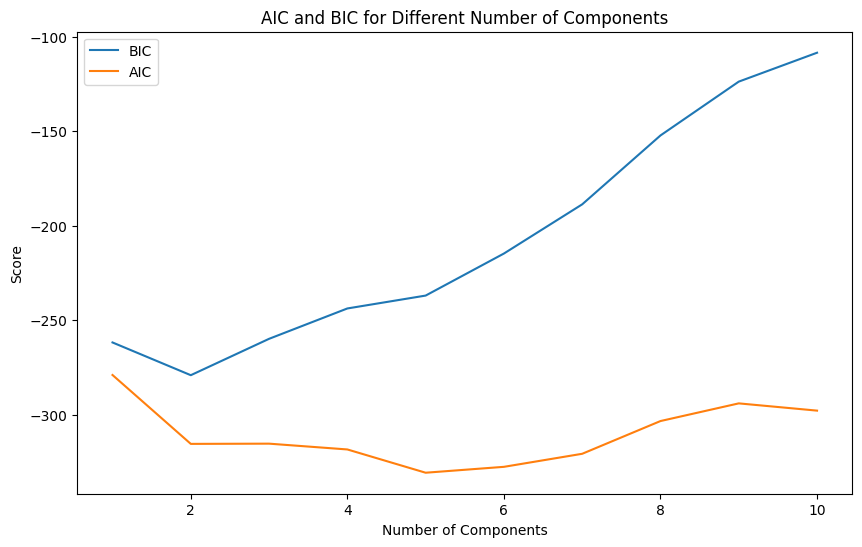

In [20]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# For this example, let's select a few columns that might be interesting for clustering
# We'll use 'annual_poverty-level_wage', 'hourly_poverty-level_wage', and 'share_below_poverty_wages'
selected_columns = ['annual_poverty-level_wage', 'hourly_poverty-level_wage', 'share_below_poverty_wages']
selected_data = poverty_level_wages_data[selected_columns]

# Normalize the selected data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(selected_data)

# Determine the optimal number of components
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_scaled) for n in n_components]

plt.figure(figsize=(10, 6))
plt.plot(n_components, [m.bic(data_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC for Different Number of Components')
plt.show()


### **Insight:**

Optimal number of components for the Gaussian Mixture Model (GMM) clustering seems to be around 4.



**Elbow Point:** The AIC and BIC curves showed significant reductions up to four components, suggesting that adding more components would not markedly improve the model's performance.

**Balance of Complexity and Fit:** Four components offer a balance, ensuring the model is complex enough to accurately represent the data but not so complex that it overfits.

**Interpretability:** A model with four components remains relatively straightforward to interpret, allowing for clear identification and understanding of data groupings.

## **Fitting the GMM with 4 Components**

In [22]:
n_components_optimal = 4
gmm = GaussianMixture(n_components=n_components_optimal, covariance_type='full', random_state=0)
gmm.fit(data_scaled)


GaussianMixture(n_components=4, random_state=0)

In [23]:
cluster_labels = gmm.predict(data_scaled)


### **Assigning Each Data Point to a Cluster**

In [26]:
data_with_clusters = poverty_level_wages_data.copy()
data_with_clusters['Cluster'] = cluster_labels


### **Adding Cluster Labels to the Dataset**

In [27]:
# Calculate the mean of selected features for each cluster
cluster_means = data_with_clusters.groupby('Cluster')[selected_columns].mean()
cluster_means


,annual_poverty-level_wage,hourly_poverty-level_wage,share_below_poverty_wages
Cluster,,,
0,9499.238095,4.567143,27.161905
1,15838.909091,7.614545,24.236364
2,24573.571429,11.814286,16.014286
3,20761.454545,9.981818,22.618182


## **Analysis of Clusters**

**Cluster 0:** Represents years with the lowest annual and hourly poverty-level wages (approximately $9,499 and $4.57, respectively). The share of wages below poverty level is the highest in this cluster (about 27.16%).

**Cluster 1:** This cluster has moderate annual and hourly poverty-level wages (around $15,839 and $7.61). The share below poverty wages is slightly lower than in Cluster 0, at around 24.24%.

**Cluster 2:** Features the highest annual and hourly poverty-level wages in the dataset (about $24,574 and $11.81). This cluster has the lowest share of wages below the poverty level (16.01%).

**Cluster 3:** This cluster has higher annual and hourly poverty-level wages than Clusters 0 and 1 but lower than Cluster 2 (approximately $20,761 and $9.98). The share below poverty wages is intermediate at around 22.62%.

## **Insights and Decisions**

The clusters appear to represent different time periods or economic conditions, with Cluster 2 likely representing more recent years with higher wages and a lower share of poverty-level wages.
Clusters 0 and 1, with lower wage levels and higher shares of poverty wages, might correspond to earlier years or periods with weaker economic conditions.
These clusters can provide valuable insights into how wage levels and poverty rates have changed over time or under different economic circumstances.

## **Documentation: Comparison of GMM and K-Means**
GMM vs. K-Means: The key difference between GMM and K-Means lies in their assumptions and flexibility. K-Means is a hard clustering method that assigns each data point to a single cluster, assuming clusters are spherical and of similar size. In contrast, GMM is a soft clustering method that allows for mixed membership, meaning a point can belong to multiple clusters with varying degrees of membership. GMM also accommodates clusters of different sizes and shapes (elliptical), making it more flexible in handling complex data structures.
Choice of Number of Components: In GMM, the choice of the number of components (clusters) is crucial and can be guided by criteria like AIC and BIC, unlike K-Means where the number of clusters is often chosen arbitrarily or using methods like the elbow method.
Model Complexity: GMM tends to be more complex than K-Means due to its flexibility and the parameters it estimates (means, variances, and covariances for each component).